In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly as py
from plotly.offline import init_notebook_mode, plot, iplot
# 2 sample t-test
import numpy as np
from scipy.stats import skew
from scipy import stats

init_notebook_mode(connected=True)
%matplotlib inline

import plotly.io as pio
pio.renderers.default = 'notebook'


In [111]:
hyd2019data = pd.read_excel('2019hyd.xlsx',index_col=0)
#hyd2020data = pd.read_csv('Makkan2020FinalHydData.csv')
hyd2020data = pd.read_csv('freshmakkan2020v1.csv')
#hyd2020cf = pd.read_csv('newhydcommondata.csv')

In [112]:
hyd2019data.shape, hyd2020data.shape

((25715, 7), (1436, 6))

In [113]:
hyd2019data['location'].unique()

array(['Maheshwaram', 'Kondakal', 'Bibinagar', 'Gachibowli', 'Shadnagar',
       'Kondapur', 'Shaikpet', 'Sanath Nagar', 'Hitech City', 'Narsingi',
       'Manikonda', 'Bhuvanagiri', 'LB Nagar', 'Shankarpalli',
       'Nanakramguda', 'Kadthal', 'Tellapur', 'Mansanpally',
       'Uppal Kalan', 'Auto Nagar', 'Yapral', 'Gandipet', 'Mangalpally',
       'Patancheru Shankarpalli Road', 'Bachupally', 'Kollur', 'Kothur',
       'Ghanpur', 'Lemoor', 'Adibatla', 'Nandigama', 'Yadagirigutta',
       'Patancheru', 'Shamshabad', 'Nallagandla Gachibowli', 'Nizampet',
       'Beeramguda', 'Madhapur', 'BHEL', 'Bachupally Road', 'Miyapur',
       'Madhapur Road', 'ECIL Main Road', 'Beeramguda Road',
       'Patancheru Industrial Area', 'Linghampally', 'ECIL Cross Road',
       'Kapra', 'Warangal Highway Aler', 'Ramachandra Puram', 'Moula Ali',
       'Suraram', 'Chandanagar', 'Gajularamaram', 'Ashok Nagar',
       'Kukatpally', 'kukatpally housing board', 'Kompally', 'Ameenpur',
       'Kundanpally', 

In [114]:
hyd2020data['location'].unique()

array(['Hitech City', 'Gachibowli', 'Madhapur', 'Serilingampally',
       'Kondapur', 'Jubilee Hills', 'Banjara Hills', 'Miyapur',
       'Manikonda'], dtype=object)

In [115]:
#hyd2020cf.groupby(['location']).count()

In [116]:
#hyd2020cf = hyd2020cf.loc[hyd2020cf['location'].isin(hyd2020data['location'])]
#hyd2020cf.to_csv('hyd2020cf.csv',index= False)

In [117]:
#hyd2020cf.loc[hyd2020cf['location']== 'Banjara Hills']

In [118]:
#hyd2020data.loc[hyd2020data['location']== 'Banjara Hills']

In [119]:
hyd2020data.loc[hyd2020data.duplicated()]


Empty DataFrame
Columns: [title, location, price(L), rate_persqft, area_insqft, building_status]
Index: []

In [120]:
hyd2020data = hyd2020data.loc[~hyd2020data.duplicated()]
hyd2020data.shape

(1436, 6)

In [121]:
hyd2020data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1436 non-null   object 
 1   location         1436 non-null   object 
 2   price(L)         1436 non-null   float64
 3   rate_persqft     1436 non-null   int64  
 4   area_insqft      1436 non-null   int64  
 5   building_status  1436 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 78.5+ KB


In [122]:
hyd2020data.shape

(1436, 6)

In [123]:
hyd2020data.groupby('location')['rate_persqft'].sum()

location
Banjara Hills       660149
Gachibowli         2368382
Hitech City        1156399
Jubilee Hills       446141
Kondapur           1630779
Madhapur            558124
Manikonda          1086404
Miyapur            1188636
Serilingampally     320846
Name: rate_persqft, dtype: int64

In [124]:
hyd2020data.groupby('building_status').count()

title  location  price(L)  rate_persqft  area_insqft
building_status                                                         
New                    91        91        91            91           91
Ready to move         584       584       584           584          584
Resale                 52        52        52            52           52
Under Construction    709       709       709           709          709

In [125]:
hyd2019data.groupby('building_status').count()

title  location  price(L)  rate_persqft  area_insqft  \
building_status                                                            
New                 12868     12868     12868         12868        12868   
Ready to move        5800      5800      5800          5800         5800   
Resale               1774      1774      1774          1774         1774   
Under Construction   5273      5273      5273          5273         5273   

                    agent_rating  
building_status                   
New                        12868  
Ready to move               5800  
Resale                      1774  
Under Construction          5273

In [126]:
hyd2019data.groupby(['location']).count()

title  price(L)  rate_persqft  area_insqft  \
location                                                              
13 Road Number 2             1         1             1            1   
20 Hyderabad Road            2         2             2            2   
2359 Old Mig Road            1         1             1            1   
2nd Phase Allwyn Colony      1         1             1            1   
6th Phase                    1         1             1            1   
...                        ...       ...           ...          ...   
nizampet road                2         2             2            2   
raidurgam                    3         3             3            3   
sheriguda                   13        13            13           13   
silpa park                   1         1             1            1   
west venkatapuram            1         1             1            1   

                         building_status  agent_rating  
location                                                
13 Road Number 2                       1             1  
20 Hyderabad Road                      2             2  
2359 Old Mig Road                      1             1  
2nd Phase Allwyn Colony                1             1  
6th Phase                              1             1  
...                                  ...           ...  
nizampet road                          2             2  
raidurgam                              3             3  
sheriguda                             13            13  
silpa park                             1             1  
west venkatapuram                      1             1  

[935 rows x 6 columns]

In [127]:
hyd2019data

title     location  price(L)  rate_persqft  \
0             Residential Plot  Maheshwaram     45.00          1111   
1             Residential Plot     Kondakal     34.00          2361   
2             Residential Plot    Bibinagar     14.19           944   
3             Residential Plot   Gachibowli    330.00          3333   
4             Residential Plot    Shadnagar      6.72           466   
...                        ...          ...       ...           ...   
25710          2 BHK Apartment  Chandanagar     47.00          4563   
25711  2 BHK Independent House  Kundanpally     25.74          3961   
25712          3 BHK Apartment  Peeramcheru     81.00          4500   
25713          2 BHK Apartment     Nizampet     34.50          3833   
25714          2 BHK Apartment  Chandanagar     40.00          4444   

       area_insqft     building_status  agent_rating  
0             4050                 New           4.6  
1             1440                 New           3.7  
2             1503                 New           4.9  
3             9900                 New           0.0  
4             1440                 New           4.7  
...            ...                 ...           ...  
25710         1030       Ready to move           0.0  
25711          650       Ready to move           0.0  
25712         1800       Ready to move           0.0  
25713          900  Under Construction           0.0  
25714          900  Under Construction           0.0  

[25715 rows x 7 columns]

In [128]:
hyd2020data.groupby(['location']).count()

title  price(L)  rate_persqft  area_insqft  building_status
location                                                                    
Banjara Hills       64        64            64           64               64
Gachibowli         354       354           354          354              354
Hitech City        166       166           166          166              166
Jubilee Hills       43        43            43           43               43
Kondapur           255       255           255          255              255
Madhapur            69        69            69           69               69
Manikonda          189       189           189          189              189
Miyapur            245       245           245          245              245
Serilingampally     51        51            51           51               51

In [129]:
newhyd2019data = hyd2019data.loc[hyd2019data['location'].isin(hyd2020data['location'])]
newhyd2019data.drop(['agent_rating'],axis=1,inplace = True)
newhyd2019data.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(2411, 6)

In [130]:
newhyd2019data.groupby(['location']).count()

title  price(L)  rate_persqft  area_insqft  building_status
location                                                                    
Banjara Hills      119       119           119          119              119
Gachibowli         891       891           891          891              891
Hitech City        189       189           189          189              189
Jubilee Hills       45        45            45           45               45
Kondapur           360       360           360          360              360
Madhapur            53        53            53           53               53
Manikonda          255       255           255          255              255
Miyapur            348       348           348          348              348
Serilingampally    151       151           151          151              151

In [131]:
newhyd2019data.head(5)

title     location  price(L)  rate_persqft  area_insqft  \
3   Residential Plot   Gachibowli    330.00          3333         9900   
5    3 BHK Apartment     Kondapur    123.00          5999         2060   
8    3 BHK Apartment  Hitech City    145.00          7754         1870   
11   3 BHK Apartment    Manikonda     85.74          4650         1844   
22       4 BHK Villa    Manikonda    662.00         12500         5300   

       building_status  
3                  New  
5   Under Construction  
8   Under Construction  
11  Under Construction  
22  Under Construction

In [132]:
hyd2020data.head(5)

title     location  price(L)  rate_persqft  area_insqft  \
0   3 BHK Apartment  Hitech City     123.0          6059         2030   
1  Residential Plot  Hitech City      14.4          1777          810   
2  Residential Plot  Hitech City      15.0          1666          900   
3   4 BHK Apartment  Hitech City     277.0          8010         3458   
4   3 BHK Apartment  Hitech City     210.0          7984         2630   

      building_status  
0       Ready to move  
1                 New  
2                 New  
3  Under Construction  
4       Ready to move

In [133]:
hyd2020data.describe().T

count         mean          std    min      25%      50%  \
price(L)      1436.0   164.528322   228.592303    3.6    62.98    99.29   
rate_persqft  1436.0  6557.005571  4031.947595  100.0  4665.00  6002.50   
area_insqft   1436.0  2303.501393  2379.574632  100.0  1278.75  1688.00   

                 75%      max  
price(L)       180.0   3101.0  
rate_persqft  7726.0  81395.0  
area_insqft   2510.0  45000.0

In [134]:
newhyd2019data.describe().T

count         mean          std    min      25%     50%  \
price(L)      2411.0   150.342849   281.678959    0.5    68.54    90.0   
rate_persqft  2411.0  6195.561593  6105.689578  100.0  4750.00  5306.0   
area_insqft   2411.0  2165.738698  1706.269541  150.0  1342.00  1714.0   

                 75%       max  
price(L)       140.0    7000.0  
rate_persqft  6500.0  172541.0  
area_insqft   2346.5   43875.0

In [135]:
newhyd2019data['title'].unique()

array(['Residential Plot', '3 BHK Apartment', '4 BHK Villa',
       '2 BHK Apartment', '1 BHK Apartment', '4 BHK Apartment',
       '5 BHK Apartment', '2 BHK Independent Floor', '5 BHK Villa',
       '9 BHK Independent House', '6 BHK Apartment',
       '1 BHK Independent Floor', '3 BHK Villa',
       '7 BHK Independent House', '2 BHK Independent House',
       '5 BHK Independent House', '6 BHK Independent House',
       '3 BHK Independent House', '4 BHK Independent House',
       '2 BHK Villa', '4 BHK Independent Floor', '1 RK Studio Apartment',
       '10 BHK Independent House', '8 BHK Independent House',
       '3 BHK Independent Floor', '9 BHK Independent Floor',
       '5 BHK Penthouse', '10 BHK Apartment', '1 BHK Independent House'],
      dtype=object)

In [136]:
newhyd2019data['location'].unique()

array(['Gachibowli', 'Kondapur', 'Hitech City', 'Manikonda', 'Madhapur',
       'Miyapur', 'Serilingampally', 'Jubilee Hills', 'Banjara Hills'],
      dtype=object)

In [137]:
newhyd2019data['building_status'].unique()

array(['New', 'Under Construction', 'Ready to move', 'Resale'],
      dtype=object)

In [138]:
hyd2020data['title'].unique()

array(['3 BHK Apartment', 'Residential Plot', '4 BHK Apartment',
       '2 BHK Apartment', '1 BHK Apartment', '4 BHK Villa',
       '5 BHK Apartment', '8 BHK Apartment', '2 BHK Independent House',
       '9 BHK Independent House', '2 BHK Villa', '1 RK Studio Apartment',
       '5 BHK Villa', '3 BHK Independent House',
       '3 BHK Independent Floor', '10 BHK Independent House',
       '4 BHK Independent House', '2 BHK Independent Floor',
       '7 BHK Apartment', '5 BHK Independent House',
       '7 BHK Independent House', '3 BHK Villa',
       '6 BHK Independent House', '6 BHK Apartment',
       '1 BHK Independent House', '7 BHK Villa',
       '8 BHK Independent House', '8 BHK Independent Floor',
       '5 BHK Independent Floor', '4 BHK Independent Floor'], dtype=object)

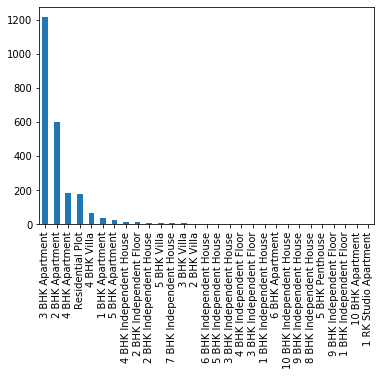

In [139]:
newhyd2019data['title'].value_counts().plot(kind='bar')

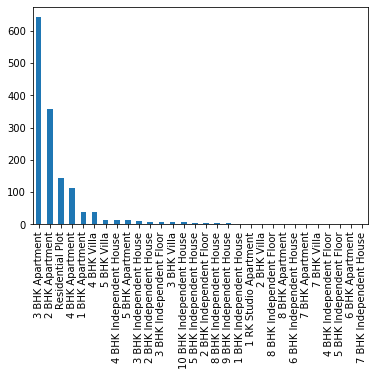

In [140]:
hyd2020data['title'].value_counts().plot(kind='bar')

In [141]:
hyd2020data['building_status'].unique()

array(['Ready to move', 'New', 'Under Construction', 'Resale'],
      dtype=object)

In [142]:
hyd2020data.loc[hyd2020data.duplicated()]


Empty DataFrame
Columns: [title, location, price(L), rate_persqft, area_insqft, building_status]
Index: []

In [143]:
newhyd2019data1 = newhyd2019data.loc[newhyd2019data['building_status'].isin(hyd2020data['building_status'])]
newhyd2019data1.shape

(2411, 6)

In [144]:
newhyd2019data2 = newhyd2019data1.loc[newhyd2019data1['title'].isin(hyd2020data['title'])]

In [145]:
newhyd2019data2.shape

(2407, 6)

In [146]:
newhyd2019data2.to_csv('2019filteredmakkandata.csv',index=False)

In [147]:
hyd2020data[~hyd2020data.isin(newhyd2019data2)]

title     location  price(L)  rate_persqft  \
0             3 BHK Apartment  Hitech City    123.00        6059.0   
1            Residential Plot  Hitech City     14.40        1777.0   
2            Residential Plot  Hitech City     15.00        1666.0   
3             4 BHK Apartment  Hitech City    277.00        8010.0   
4             3 BHK Apartment  Hitech City    210.00        7984.0   
...                       ...          ...       ...           ...   
1431  8 BHK Independent House    Manikonda    600.00        6000.0   
1432          2 BHK Apartment    Manikonda    191.00        7991.0   
1433          3 BHK Apartment    Manikonda    111.00        5000.0   
1434          3 BHK Apartment    Manikonda     91.80        5000.0   
1435          2 BHK Apartment    Manikonda     66.75        5000.0   

      area_insqft     building_status  
0          2030.0       Ready to move  
1           810.0                 New  
2           900.0                 New  
3          3458.0  Under Construction  
4          2630.0       Ready to move  
...           ...                 ...  
1431      10000.0       Ready to move  
1432       2390.0       Ready to move  
1433       2238.0                 NaN  
1434       1836.0  Under Construction  
1435       1335.0  Under Construction  

[1436 rows x 6 columns]

In [148]:
newhyd2019data2.groupby('building_status')['location'].count()

building_status
New                    113
Ready to move         1177
Resale                  68
Under Construction    1049
Name: location, dtype: int64

In [149]:
newhyd2019data2.groupby(['location','building_status']).count()

title  price(L)  rate_persqft  area_insqft
location        building_status                                               
Banjara Hills   New                     5         5             5            5
                Ready to move          92        92            92           92
                Resale                  7         7             7            7
                Under Construction     14        14            14           14
Gachibowli      New                    71        71            71           71
                Ready to move         207       207           207          207
                Resale                 11        11            11           11
                Under Construction    601       601           601          601
Hitech City     New                     2         2             2            2
                Ready to move          94        94            94           94
                Resale                  4         4             4            4
                Under Construction     89        89            89           89
Jubilee Hills   New                     3         3             3            3
                Ready to move          27        27            27           27
                Resale                  9         9             9            9
                Under Construction      6         6             6            6
Kondapur        New                     8         8             8            8
                Ready to move         200       200           200          200
                Resale                 10        10            10           10
                Under Construction    142       142           142          142
Madhapur        New                     3         3             3            3
                Ready to move          43        43            43           43
                Resale                  3         3             3            3
                Under Construction      4         4             4            4
Manikonda       New                     4         4             4            4
                Ready to move         195       195           195          195
                Resale                  6         6             6            6
                Under Construction     50        50            50           50
Miyapur         New                    15        15            15           15
                Ready to move         221       221           221          221
                Resale                 14        14            14           14
                Under Construction     96        96            96           96
Serilingampally New                     2         2             2            2
                Ready to move          98        98            98           98
                Resale                  4         4             4            4
                Under Construction     47        47            47           47

In [150]:
hyd2020data.groupby(['location','building_status']).count()

title  price(L)  rate_persqft  area_insqft
location        building_status                                               
Banjara Hills   New                     1         1             1            1
                Ready to move          43        43            43           43
                Resale                  8         8             8            8
                Under Construction     12        12            12           12
Gachibowli      New                    43        43            43           43
                Ready to move          91        91            91           91
                Resale                 12        12            12           12
                Under Construction    208       208           208          208
Hitech City     New                     5         5             5            5
                Ready to move          72        72            72           72
                Resale                  1         1             1            1
                Under Construction     88        88            88           88
Jubilee Hills   New                     1         1             1            1
                Ready to move          23        23            23           23
                Resale                  4         4             4            4
                Under Construction     15        15            15           15
Kondapur        New                     8         8             8            8
                Ready to move         109       109           109          109
                Resale                  6         6             6            6
                Under Construction    132       132           132          132
Madhapur        New                     6         6             6            6
                Ready to move          43        43            43           43
                Resale                  3         3             3            3
                Under Construction     17        17            17           17
Manikonda       New                     1         1             1            1
                Ready to move         108       108           108          108
                Resale                 10        10            10           10
                Under Construction     70        70            70           70
Miyapur         New                    24        24            24           24
                Ready to move          74        74            74           74
                Resale                  5         5             5            5
                Under Construction    142       142           142          142
Serilingampally New                     2         2             2            2
                Ready to move          21        21            21           21
                Resale                  3         3             3            3
                Under Construction     25        25            25           25

In [151]:
#combined20192020 = pd.read_csv('2019filteredmakkandata.csv')

In [152]:
# var = hyd2020data.isin(newhyd2019data2)
# if(var == True):
# #     print(a)


In [153]:
hyd2020data.shape

(1436, 6)

In [154]:
# newhyd2019data2['price(L)'] = newhyd2019data2['price(L)']*100000
# hyd2020data['price(L)'] = hyd2020data['price(L)']*100000

In [155]:
hyd2020data.groupby('location').describe()
# only one record in the below areas scraping has to be done to get more records 
#Gopanpally,Bhuvanagiri,Hitech City,Narsingi,Yapral

price(L)                                                   \
                   count        mean         std    min       25%     50%   
location                                                                    
Banjara Hills       64.0  450.959687  534.994020   5.43  150.0000  284.50   
Gachibowli         354.0  180.653870  230.531905   3.60   87.8725  105.50   
Hitech City        166.0  164.401988   90.230677   4.50  110.0000  155.00   
Jubilee Hills       43.0  421.976744  470.447431  15.00  175.0000  374.00   
Kondapur           255.0  133.028667  124.209331   4.50   72.3400  103.00   
Madhapur            69.0  277.017391  323.427099   4.50   39.0000  207.00   
Manikonda          189.0  112.654021   93.490698   4.50   64.4000   78.26   
Miyapur            245.0   63.647469   68.436500   4.50   35.9500   49.00   
Serilingampally     51.0  158.672549  168.157645   7.50   53.5000   88.00   

                                rate_persqft                ...            \
                    75%     max        count          mean  ...       75%   
location                                                    ...             
Banjara Hills    450.00  3101.0         64.0  10314.828125  ...  11553.75   
Gachibowli       194.75  2500.0        354.0   6690.344633  ...   7346.50   
Hitech City      219.50   523.0        166.0   6966.259036  ...   8283.50   
Jubilee Hills    444.00  2500.0         43.0  10375.372093  ...  11519.00   
Kondapur         156.50  1075.0        255.0   6395.211765  ...   7189.50   
Madhapur         365.00  1800.0         69.0   8088.753623  ...  10564.00   
Manikonda        115.00   600.0        189.0   5748.169312  ...   6074.00   
Miyapur           76.00   610.0        245.0   4851.575510  ...   5231.00   
Serilingampally  202.00   910.0         51.0   6291.098039  ...   8740.50   

                         area_insqft                                   \
                     max       count         mean          std    min   
location                                                                
Banjara Hills    30864.0        64.0  3865.984375  3608.554860  288.0   
Gachibowli       32051.0       354.0  2925.878531  3778.303888  100.0   
Hitech City      13918.0       166.0  2174.180723   828.972429  607.0   
Jubilee Hills    27777.0        43.0  3468.209302  1994.151240  900.0   
Kondapur         20093.0       255.0  1908.203922  1033.892121  100.0   
Madhapur         22222.0        69.0  2791.072464  2240.490409  100.0   
Manikonda        33333.0       189.0  1922.576720  1280.078966  300.0   
Miyapur          81395.0       245.0  1471.902041  1213.629382  145.0   
Serilingampally  14893.0        51.0  2185.058824  1391.836347  400.0   

                                                    
                     25%     50%      75%      max  
location                                            
Banjara Hills    2016.50  2825.0  4500.00  20000.0  
Gachibowli       1465.75  1849.0  3139.75  45000.0  
Hitech City      1580.00  2105.5  2843.75   4500.0  
Jubilee Hills    1900.00  3537.0  4402.50   9000.0  
Kondapur         1279.50  1630.0  2237.50   9000.0  
Madhapur         1200.00  2625.0  3455.00  15750.0  
Manikonda        1280.00  1585.0  1875.00  10000.0  
Miyapur          1053.00  1214.0  1556.00  13500.0  
Serilingampally  1231.50  1660.0  2892.50   6300.0  

[9 rows x 24 columns]

In [156]:
newhyd2019data2.groupby('location').describe()

price(L)                                                    \
                   count        mean          std    min       25%     50%   
location                                                                     
Banjara Hills      118.0  395.572542   800.742019   6.17  140.0000  223.50   
Gachibowli         890.0  136.800303   171.001702  10.00   79.2800   90.00   
Hitech City        189.0  162.453862   117.010546   5.25  107.0000  134.00   
Jubilee Hills       45.0  747.167556  1019.001251   0.50  147.0000  500.00   
Kondapur           360.0  120.358500    82.559712   3.00   76.9500  100.00   
Madhapur            53.0  286.390000   348.435073  19.00  100.0000  231.00   
Manikonda          255.0  110.849216   114.091980  10.28   56.9200   72.35   
Miyapur            346.0   66.176908    53.233055   4.20   43.7125   58.00   
Serilingampally    151.0  124.231589    87.511256  15.00   75.6700   96.50   

                                rate_persqft                ...           \
                    75%     max        count          mean  ...      75%   
location                                                    ...            
Banjara Hills    437.25  7000.0        118.0  10397.347458  ...  11111.0   
Gachibowli       122.00  2800.0        890.0   5745.142697  ...   5900.0   
Hitech City      179.00   950.0        189.0   6808.613757  ...   7681.0   
Jubilee Hills    882.00  5000.0         45.0  15572.311111  ...  14134.0   
Kondapur         133.00   580.0        360.0   6186.455556  ...   6057.0   
Madhapur         330.00  2400.0         53.0   9736.679245  ...   9598.0   
Manikonda        109.00   800.0        255.0   5368.180392  ...   5809.0   
Miyapur           67.00   500.0        346.0   4562.936416  ...   5200.0   
Serilingampally  139.50   600.0        151.0   5874.264901  ...   6293.0   

                          area_insqft                                    \
                      max       count         mean          std     min   
location                                                                  
Banjara Hills    172541.0       118.0  3444.474576  4185.493729  1003.0   
Gachibowli        36931.0       890.0  2281.221348  1579.324906   500.0   
Hitech City       15833.0       189.0  2261.767196   935.852012   650.0   
Jubilee Hills    172222.0        45.0  4143.422222  2627.665231   150.0   
Kondapur          50000.0       360.0  1969.663889   867.122691   200.0   
Madhapur          88863.0        53.0  3054.811321  2510.441633   650.0   
Manikonda         15555.0       255.0  1846.780392   946.108020   450.0   
Miyapur           12953.0       346.0  1459.644509  1348.990843   450.0   
Serilingampally   13703.0       151.0  2009.655629   866.215547   880.0   

                                                   
                    25%     50%      75%      max  
location                                           
Banjara Hills    2000.0  2580.0  3600.00  43875.0  
Gachibowli       1538.0  1792.0  2208.00  21600.0  
Hitech City      1660.0  2045.0  2695.00   6000.0  
Jubilee Hills    1980.0  4245.0  5000.00  10287.0  
Kondapur         1360.0  1800.0  2312.50   8000.0  
Madhapur         1636.0  2400.0  3500.00  18000.0  
Manikonda        1237.5  1570.0  2067.50   5860.0  
Miyapur          1120.0  1200.0  1401.75  18900.0  
Serilingampally  1350.0  1780.0  2445.00   6110.0  

[9 rows x 24 columns]

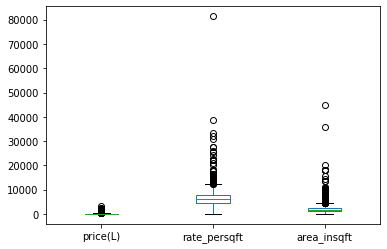

In [157]:
hyd2020data.plot(kind="box")

In [158]:
hyd2020data.groupby('location').count()

title  price(L)  rate_persqft  area_insqft  building_status
location                                                                    
Banjara Hills       64        64            64           64               64
Gachibowli         354       354           354          354              354
Hitech City        166       166           166          166              166
Jubilee Hills       43        43            43           43               43
Kondapur           255       255           255          255              255
Madhapur            69        69            69           69               69
Manikonda          189       189           189          189              189
Miyapur            245       245           245          245              245
Serilingampally     51        51            51           51               51

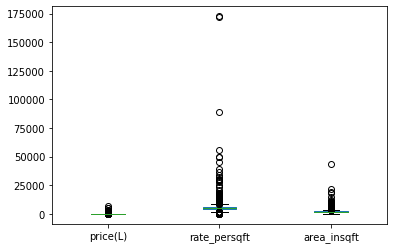

In [159]:
newhyd2019data2.plot(kind="box")

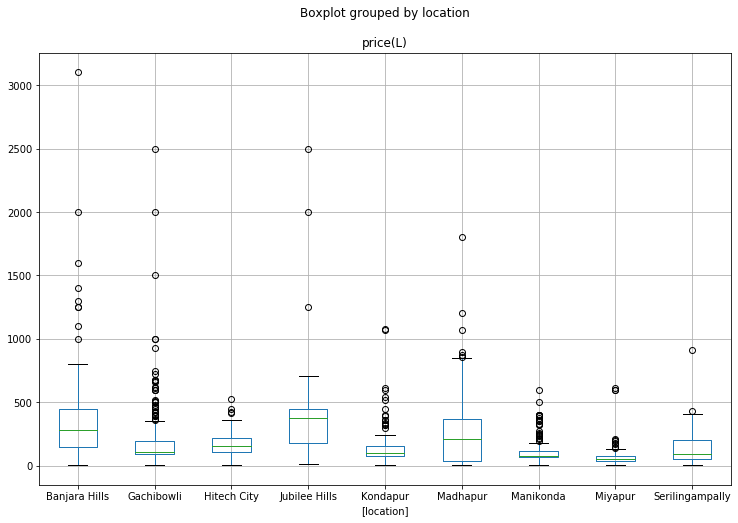

In [160]:
hyd2020data.boxplot(column=['price(L)'],by=['location'],figsize=(12,8))

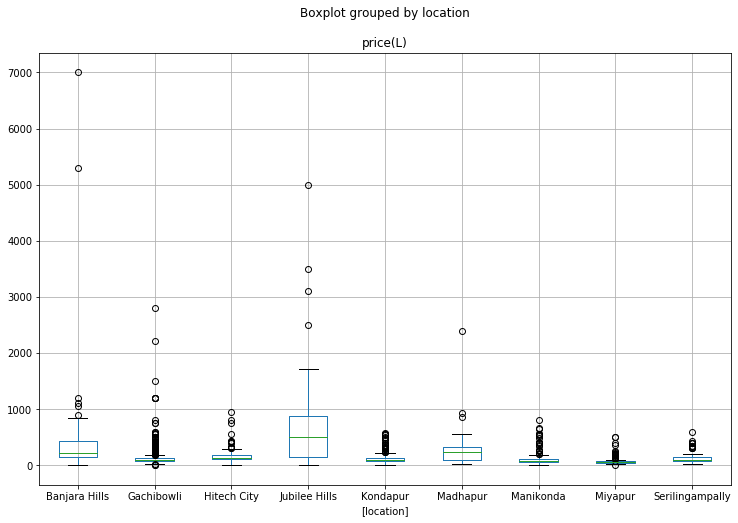

In [161]:
newhyd2019data2.boxplot(column=['price(L)'],by=['location'],figsize=(12,8))

In [162]:
data = newhyd2019data2.groupby('location')['rate_persqft'].mean()
trace = go.Bar(x = data.index,
               #text = ['{:.1f} %'.format(val) for val in (data.values / electronicsdf.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000111'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of  average price of plots according to location'.format(newhyd2019data2.shape[0]),
              xaxis = dict(title = 'location'),
              yaxis = dict(title = 'price(L)'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
#iplot(fig)
py.offline.iplot(fig)

In [163]:
# #viewing year wise ratings in a graphical view
# data = newhyd2019data2.groupby('location')['rate_persqft'].count()
# trace = go.Bar(x = data.index,
#                text = ['{:.1f} %'.format(val) for val in (data.values / newhyd2019data2.shape[0] * 100)],
#                textposition = 'auto',
#                textfont = dict(color = '#000111'),
#                y = data.values,
#                )
# # Create layout
# layout = dict(title = 'Percentage Distribution Of {} price of plots according to location'.format(newhyd2019data2.shape[0]),
#               xaxis = dict(title = 'location'),
#               yaxis = dict(title = 'priceinL'))
# # Create plot
# fig = go.Figure(data=[trace], layout=layout)
# #iplot(fig)
# py.offline.iplot(fig)


In [164]:
data = hyd2020data.groupby('location')['rate_persqft'].mean()
trace = go.Bar(x = data.index,
               #text = ['{:.1f} %'.format(val) for val in (data.values / electronicsdf.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000111'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of  average price of plots according to location'.format(hyd2020data.shape[0]),
              xaxis = dict(title = 'location'),
              yaxis = dict(title = 'price(L)'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
#iplot(fig)
py.offline.iplot(fig)

In [165]:
# data = hyd2020data.groupby('location')['rate_persqft'].count()
# print(data.values)
# print(hyd2020data.shape[0])
# trace = go.Bar(x = data.index,
#                text = ['{:.1f} %'.format(val) for val in (data.values / hyd2020data.shape[0] * 100)],
#                textposition = 'auto',
#                textfont = dict(color = '#000111'),
#                y = data.values,
#                )
# # Create layout
# layout = dict(title = 'Percentage Distribution Of {} price of plots according to location'.format(hyd2020data.shape[0]),
#               xaxis = dict(title = 'location'),
#               yaxis = dict(title = 'priceinL'))
# # Create plot
# fig = go.Figure(data=[trace], layout=layout)
# #iplot(fig)
# py.offline.iplot(fig)

In [166]:
newhyd2019data2['price(L)'].mean()

150.0567552970502

Hitech City


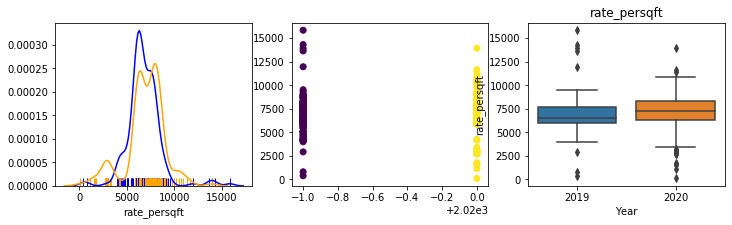

Gachibowli


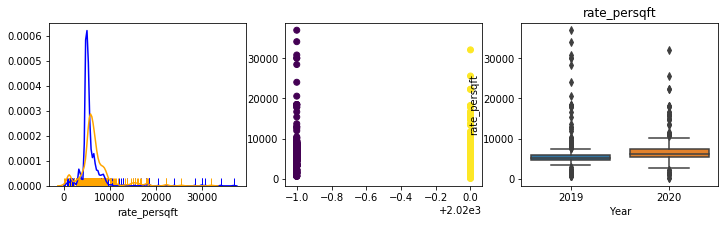

Madhapur


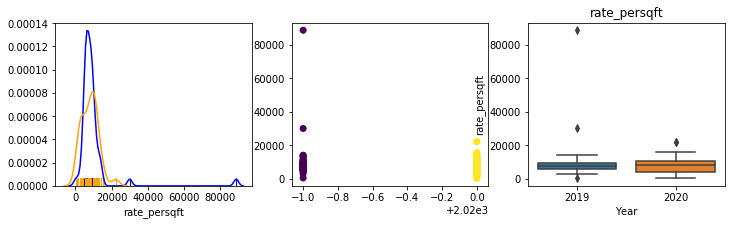

Serilingampally


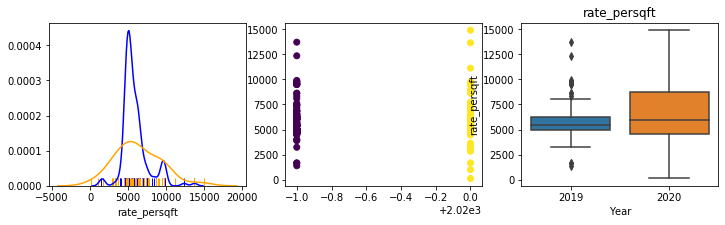

Kondapur


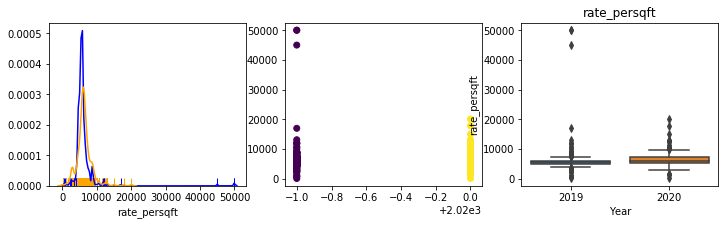

Jubilee Hills


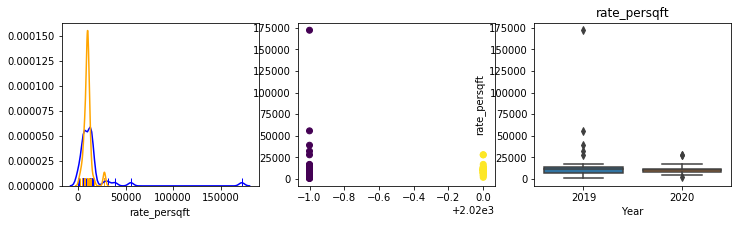

Banjara Hills


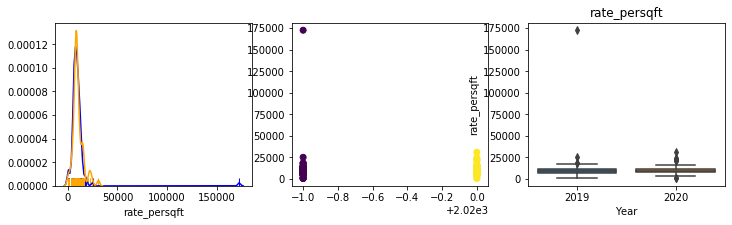

Miyapur


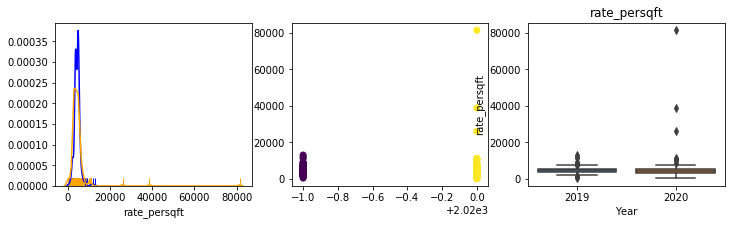

Manikonda


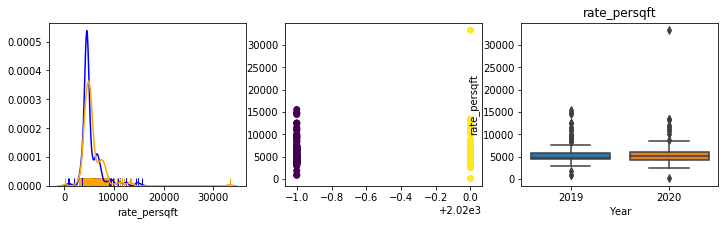

In [167]:
import numpy as np
def printPairKdeAndBoxPlot(df, cols, hueVal):
    for col in cols:
        if(col != hueVal):   
            target_0 = df[df[hueVal]==2019]
            target_1 = df[df[hueVal]==2020]
            f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3))
            sns.distplot(target_0[col], hist=False, rug=True, ax=ax1, color='blue')
            sns.distplot(target_1[col], hist=False, rug=True, ax=ax1, color='orange')
            ax2.scatter(df[hueVal], df[col], c=df[hueVal])
            sns.boxplot(x=hueVal, y=col, data=df, ax=ax3)
            plt.title(col)
            plt.show() 

areas = np.array(hyd2020data['location'].unique())
for area in areas:
    print(area)
    area_2019_data = pd.DataFrame(newhyd2019data2[newhyd2019data2['location']==area].reset_index()['rate_persqft'])
    area_2019_data.columns = ['rate_persqft']
    area_2019_data['Year'] = 2019
    area_2020_data = pd.DataFrame(hyd2020data[hyd2020data['location']==area].reset_index()['rate_persqft'])
    area_2020_data.columns = ['rate_persqft']
    area_2020_data['Year'] = 2020
    area_data = pd.concat([area_2019_data, area_2020_data])
    printPairKdeAndBoxPlot(area_data, ['rate_persqft'], 'Year')

In [168]:
hyd2020data['price(L)'].mean()

164.5283217270195

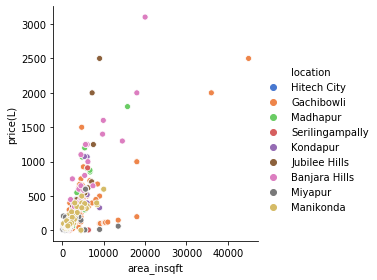

In [169]:
sns.relplot(x="area_insqft", y="price(L)", hue="location", 
            sizes=(10, 20), alpha=1.0, palette="muted",
            height=4, data=hyd2020data)

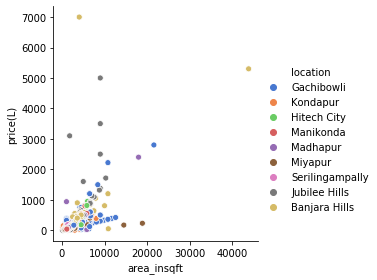

In [170]:
sns.relplot(x="area_insqft", y="price(L)", hue="location", 
            sizes=(10, 20), alpha=1.0, palette="muted",
            height=4, data=newhyd2019data2)

In [171]:
#H0 = There is no significant difference in real estate price before and after covid for Gachibowli
#Hq = There is  significant difference in real estate price before and after covid for Gachibowli
location = np.array(hyd2020data['location'].unique())
for loc in location:
    data1 = np.array(hyd2020data[hyd2020data['location'] == loc].rate_persqft)
    data2 = np.array(newhyd2019data2[newhyd2019data2['location'] == loc].rate_persqft)
    t, p_value = stats.ttest_ind(data1 ,data2 , axis = 0)
    if p_value < 0.05:
        if t < 0:
            state = 'decreased'
        else:
            state = 'increased'
        print(loc, state, ':There is a significant difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', p_value, t)
    else:
        print(loc, ':There is no significant difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', p_value, t)

Hitech City :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.44189874089222947 0.7698584313192719
Gachibowli increased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 1.785404356576121e-06 4.7993011514387085
Madhapur :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.291105356175978 -1.0603711557402327
Serilingampally :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.2271713007932731 1.211400564015628
Kondapur :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.4686132372083912 0.7251883246750049
Jubilee Hills :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.19871746839047108 -1.2951997677916969
Banjara Hills :There is no significant difference between prices between 20

In [172]:
area_names = []
price_2019=[]
price_2020=[]
result = pd.DataFrame()
for area in areas:
    data_2019 = newhyd2019data2[newhyd2019data2['location']==area]['rate_persqft']
    data_2020 = hyd2020data[hyd2020data['location']==area]['rate_persqft']
    area_names.append(area)
    price_2019.append(data_2019.median())
    price_2020.append(data_2020.median())

result['Area'] = area_names
result['price_2019'] = price_2019
result['price_2020'] = price_2020
result['Diff'] = result['price_2020']-result['price_2019']
result


Area  price_2019  price_2020    Diff
0      Hitech City      6533.0      7219.5   686.5
1       Gachibowli      5200.0      6100.0   900.0
2         Madhapur      7665.0      7986.0   321.0
3  Serilingampally      5400.0      5927.0   527.0
4         Kondapur      5700.0      6095.0   395.0
5    Jubilee Hills     11702.0     10000.0 -1702.0
6    Banjara Hills      8996.0      8937.5   -58.5
7          Miyapur      4747.5      4150.0  -597.5
8        Manikonda      4650.0      5098.0   448.0

Trying to include more data points for 2020 to cross verify the results. scrapped data from CommonFloor

In [173]:
hyd2020cf = pd.read_csv('finalcommon24june.csv')
hyd2020cf.isna().sum(),hyd2020cf.shape


(price(L)           0
 rate_persqft       0
 building_status    0
 floor              1
 title              0
 location           0
 area_insqft        1
 dtype: int64,
 (220, 7))

In [174]:
hyd2020cf = hyd2020cf.loc[~hyd2020cf.duplicated()]
hyd2020cf

price(L)  rate_persqft     building_status floor             title  \
0    17500000          9211       Ready To Move    16    3BHK Apartment   
1    10000000          6250       Ready To Move    21    3BHK Apartment   
2    39500000          6583       Ready To Move     6       4 BHK Villa   
3    10000000          7610       Ready To Move    14    2BHK Apartment   
4     9700000          7566  Under Construction    16    3BHK Apartment   
..        ...           ...                 ...   ...               ...   
215   5890000          6801              Resale     0    2BHK Apartment   
216   3600000          3830              Resale     0    2BHK Apartment   
217  14800000          7621       Ready To Move    11    3BHK Apartment   
218   6964000          6633  Under Construction     4    2BHK Apartment   
219  18400000          7863                 New   NaN  Residential Plot   

       location  area_insqft  
0    Gachibowli       1900.0  
1    Gachibowli       1600.0  
2    Gachibowli       6000.0  
3    Gachibowli       1314.0  
4    Gachibowli       1282.0  
..          ...          ...  
215   Manikonda        866.0  
216   Manikonda        940.0  
217   Manikonda       1955.0  
218   Manikonda       1050.0  
219     Miyapur       2340.0  

[219 rows x 7 columns]

In [175]:
hyd2020cf['price(L)'] = hyd2020cf['price(L)']/100000.0

In [176]:
hyd2020cf1 = hyd2020cf.loc[hyd2020cf['location'].isin(hyd2020data['location'])]
hyd2020cf1.shape

(153, 7)

In [177]:
#hyd2020cf1['rate_persqft'] = hyd2020cf1['rate_persqft'].str.replace(' Plot Area','')

In [178]:
hyd2020cf1.drop(['floor'],axis= 1,inplace =True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [179]:
hyd2020cf1['area_insqft'].unique()

array([ 1900.,  1600.,  6000.,  1314.,  1282.,  1198.,  1634.,  1599.,
        5756.,  3977.,  1656.,  3777.,   700.,  1339.,  2315.,  1354.,
        2598.,  1271.,  1424.,  1361.,  1332.,   200.,  2982.,  1213.,
         235.,  1538.,  1000.,  1200.,  4013.,  1500.,  1095.,  2607.,
        1400., 16874.,  1800.,   135.,  2652.,  5402.,  1350.,   133.,
        2700.,  2403.,  1368.,  1482.,   605., 10557., 11781., 24300.,
         750.,  1300.,   147.,  1280.,  1830.,  1092.,  4800.,  2200.,
         300.,   825.,  1938.,  1849.,  1360.,  1960.,  1120.,  1103.,
        2040.,  1990.,   100.,  1275.,  2150.,  2000.,   400.,   995.,
         900.,  1780.,  1440.,  1638.,  1080.,   950.,   920.,  1050.,
         863.,  1100.,  1575.,  1590.,  1166.,   911.,  1167.,  2536.,
         960.,  1253.,  1410.,  2920.,  1013.,  1178.,  4200.,   940.,
        1176.,  1055.,  1150.,   866.,  1955.,  2340.])

In [180]:
hyd2020cf1.to_csv('hyd2020cfnew.csv',index=False)

In [181]:
# #if apartment is not 1 BHK then sq ft should be greater than 500. otherwise they are outliers which should be treated
# hyd2020cf1 = hyd2020cf1.loc[~((hyd2020cf1['area_insqft'] < 500 ) & ~(hyd2020cf1['title'] == '1 BHK Apartment'))]
# hyd2020cf1.shape

In [182]:
# htobecleaned['area_insqft'] = htobecleaned['area_insqft']*10

In [183]:
# htobecleaned['rate_persqft'] = htobecleaned['price(L)']/htobecleaned['area_insqft']

In [184]:
hyd2020cf1.loc[(hyd2020cf1['area_insqft'] < 500 ) & ~(hyd2020cf1['title'] == '1 BHK Apartment')]

price(L)  rate_persqft     building_status              title  \
24      82.73         41366  Under Construction     2BHK Apartment   
27      76.16         32409  Under Construction   2.5BHK Apartment   
39      70.00          7778       Ready To Move     2BHK Apartment   
44     100.00         74074              Resale  Residential Plot    
45     165.00         12177       Ready To Move     2BHK Apartment   
59       8.35          5686              Resale  Residential Plot    
107    180.00         90000       Ready To Move     3BHK Apartment   
108    260.00         86667       Ready To Move     4BHK Apartment   
118    260.00        130000       Ready To Move     4BHK Apartment   
143     83.87         41938  Under Construction     3BHK Apartment   
149     92.15         92156  Under Construction     3BHK Apartment   
151    101.00         50774  Under Construction     3BHK Apartment   
152    353.00         17650       Ready To Move     4BHK Apartment   
156    353.00         88313       Ready To Move         4BHK Villa   
157    350.00         87638       Ready To Move         4BHK Villa   
158    353.00        117750       Ready To Move         4BHK Villa   

            location  area_insqft  
24        Gachibowli        200.0  
27        Gachibowli        235.0  
39          Kondapur        135.0  
44          Kondapur        135.0  
45          Kondapur        133.0  
59          Madhapur        147.0  
107    Banjara Hills        200.0  
108    Banjara Hills        300.0  
118    Banjara Hills        200.0  
143  Serilingampally        200.0  
149  Serilingampally        100.0  
151  Serilingampally        200.0  
152  Serilingampally        200.0  
156  Serilingampally        400.0  
157  Serilingampally        400.0  
158  Serilingampally        300.0

In [185]:
hyd2020cf1  =hyd2020cf1.loc[~(hyd2020cf1['area_insqft'] < 500 ) & ~(hyd2020cf1['title'] == '1 BHK Apartment')]
hyd2020cf1.shape

(137, 6)

In [186]:
hyd2020cf1['area_insqft'] = hyd2020cf1['area_insqft'].astype(int)
hyd2020data.shape
hyd2020data.loc[hyd2020data.duplicated()]
hyd2020cf1.isna().sum()
hyd2020cf1.groupby(['location']).count()

price(L)  rate_persqft  building_status  title  area_insqft
location                                                                    
Banjara Hills          12            12               12     12           12
Gachibowli             28            28               28     28           28
Jubilee Hills           2             2                2      2            2
Kondapur               24            24               24     24           24
Madhapur                7             7                7      7            7
Manikonda              28            28               28     28           28
Miyapur                27            27               27     27           27
Serilingampally         9             9                9      9            9

In [187]:
#Building model only with commonfloor data
location = np.array(hyd2020cf1['location'].unique())
for loc in location:
    data1 = np.array(hyd2020cf1[hyd2020cf1['location'] == loc].rate_persqft)
    #print(data1)
    data2 = np.array(newhyd2019data2[newhyd2019data2['location'] == loc].rate_persqft)
    #print(data2)
    stat , p_value = stats.ttest_ind(data1, data2)
    if p_value < 0.05:
        if stat < 0:
            state = 'decreased'
        else:
            state = 'increased'
        print(loc, state, ':There is a significant difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', p_value, stat)
    else:
        print(loc, ':There is no significant difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', p_value, stat)


Gachibowli increased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.0008062230146279359 3.361864499926606
Kondapur :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.0553850410851422 1.9217169508648948
Madhapur :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.4365189398439365 -0.7835042202300366
Banjara Hills :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.678235582233051 0.4158233506600917
Jubilee Hills :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.5002929988166702 -0.6795137635200813
Serilingampally increased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 4.13725784923604e-05 4.218127024210126
Miyapur increased :There is a significant difference between pric

In [188]:
area_names = []
price_2019=[]
price_2020=[]
result = pd.DataFrame()
for area in areas:
    data_2019 = newhyd2019data2[newhyd2019data2['location']==area]['rate_persqft']
    data_2020 = hyd2020data[hyd2020data['location']==area]['rate_persqft']
    area_names.append(area)
    price_2019.append(data_2019.mean())
    price_2020.append(data_2020.mean())

result['Area'] = area_names
result['price_2019'] = price_2019
result['price_2020'] = price_2020
result['Diff'] = result['price_2020']-result['price_2019']
result


Area    price_2019    price_2020         Diff
0      Hitech City   6808.613757   6966.259036   157.645280
1       Gachibowli   5745.142697   6690.344633   945.201936
2         Madhapur   9736.679245   8088.753623 -1647.925622
3  Serilingampally   5874.264901   6291.098039   416.833139
4         Kondapur   6186.455556   6395.211765   208.756209
5    Jubilee Hills  15572.311111  10375.372093 -5196.939018
6    Banjara Hills  10397.347458  10314.828125   -82.519333
7          Miyapur   4562.936416   4851.575510   288.639094
8        Manikonda   5368.180392   5748.169312   379.988920

Predictions with only common floor data seems to be wrong due to insufficient datapoint.Combining scrapped data of commonfloor and makkan

In [189]:
comb2020data = pd.DataFrame()
comb2020data = pd.concat([hyd2020data,hyd2020cf1])
comb2020data.shape

(1573, 6)

In [190]:
hyd2020data.groupby('location').count()

title  price(L)  rate_persqft  area_insqft  building_status
location                                                                    
Banjara Hills       64        64            64           64               64
Gachibowli         354       354           354          354              354
Hitech City        166       166           166          166              166
Jubilee Hills       43        43            43           43               43
Kondapur           255       255           255          255              255
Madhapur            69        69            69           69               69
Manikonda          189       189           189          189              189
Miyapur            245       245           245          245              245
Serilingampally     51        51            51           51               51

In [191]:
comb2020data.groupby('location').count()

title  price(L)  rate_persqft  area_insqft  building_status
location                                                                    
Banjara Hills       76        76            76           76               76
Gachibowli         382       382           382          382              382
Hitech City        166       166           166          166              166
Jubilee Hills       45        45            45           45               45
Kondapur           279       279           279          279              279
Madhapur            76        76            76           76               76
Manikonda          217       217           217          217              217
Miyapur            272       272           272          272              272
Serilingampally     60        60            60           60               60

In [192]:
#comb2020data['rate_persqft'] = comb2020data['rate_persqft'].str.replace('Build-up Area','')

In [193]:
comb2020data.loc[comb2020data.duplicated()]
#comb2020data.to_csv('comb2020datanew.csv',index = False)

Empty DataFrame
Columns: [title, location, price(L), rate_persqft, area_insqft, building_status]
Index: []

In [194]:
comb2020data['rate_persqft'].unique()

array([ 6059,  1777,  1666,  8010,  7984,  7911,  8113,  9259,  2870,
        7155,  4250,  4166,  2704,  3052,  3230,  7037,  7522,  7444,
        6944,  8989,  1555, 10000,  7083,  8461,  7088,  7772,  7739,
        7970,  7828,  7955,  7851,  8128,  8097,  7724,  7806,  7797,
        7860,  7818,  8109,  8958,  6923,  7416,  7499,  7443,  7555,
        7012,  7175,  7600,  6349,  6500,  8297,  6481,  6348,  6666,
       11368, 10466,  8290,  8446, 13918,  1149,  7768,  6898,   100,
        8061, 11640,  6962,  7885,  6329, 10495, 10171,  8004,  8328,
       10437,  7899,  8000,  8300,  8578,  7668,  7361, 10726,  9796,
        9042,  8264,  8325,  9263, 10920,  6100,  5899,  5885,  5903,
        5879,  8347,  8645,  7264,  6296,  2941,  3076,  2952,  2884,
        2818,  2836,  8080,  2717,  7319,  3391,  2775,  7918,  7718,
        8302, 10130,  7941,  4090,  4444,  5729,  8875,  5416,  9167,
        2200,  8620, 10263,  6000, 15000,  6485,  6811,  6640,  6333,
        6460,  8789,

In [195]:
#comb2020data =pd.read_csv('comb2020datanew.csv')
comb2020data.isna().sum()

title              0
location           0
price(L)           0
rate_persqft       0
area_insqft        0
building_status    0
dtype: int64

In [196]:
comb2020data['price(L)'].unique()

array([ 123.  ,   14.4 ,   15.  ,  277.  ,  210.  ,  125.  ,  200.  ,
        250.  ,   30.  ,   25.8 ,   50.  ,   35.  ,   29.  ,   21.  ,
        152.  ,  170.  ,  150.  ,  218.  ,   14.  ,  325.  ,   85.  ,
        165.  ,  112.  ,  178.  ,  163.  ,  155.  ,  179.  ,  148.  ,
        241.  ,  183.  ,  146.  ,  153.  ,  223.  ,  147.  ,  172.  ,
        215.  ,   81.  ,  230.  ,  236.  ,  189.  ,  190.  ,  124.  ,
        133.  ,  195.  ,  140.  ,  181.  ,  143.  ,  188.  ,  118.  ,
        119.  ,  110.  ,  129.  ,  295.  ,  426.  ,  290.  ,  256.  ,
        450.  ,   94.  ,  149.  ,    4.5 ,  282.  ,  523.  ,  204.  ,
        100.  ,  360.  ,  414.  ,  276.  ,  291.  ,  358.  ,  139.  ,
        205.  ,  261.  ,  252.  ,  257.  ,  253.  ,  251.  ,  144.  ,
        111.  ,  260.  ,  240.  ,  220.  ,  130.  ,  120.  ,  262.  ,
        331.  ,  136.  ,  135.  ,  122.  ,  115.  ,   96.38,   86.  ,
         70.76,   85.4 ,  109.  ,   97.6 ,   76.25,   73.2 ,   73.74,
        206.  ,  127

In [197]:
comb2020data['location'].unique()

array(['Hitech City', 'Gachibowli', 'Madhapur', 'Serilingampally',
       'Kondapur', 'Jubilee Hills', 'Banjara Hills', 'Miyapur',
       'Manikonda'], dtype=object)

In [198]:
comb2020data.loc[comb2020data['title'].isna()]

Empty DataFrame
Columns: [title, location, price(L), rate_persqft, area_insqft, building_status]
Index: []

In [199]:
comb2020data.isna().sum()

title              0
location           0
price(L)           0
rate_persqft       0
area_insqft        0
building_status    0
dtype: int64

In [200]:
newhyd2019data2[newhyd2019data2['title'] == 'Residential Plot']

title       location  price(L)  rate_persqft  area_insqft  \
3      Residential Plot     Gachibowli     330.0          3333         9900   
305    Residential Plot     Gachibowli      60.0          2222         2700   
312    Residential Plot     Gachibowli      40.0          2222         1800   
313    Residential Plot     Gachibowli      80.0          2222         3600   
463    Residential Plot     Gachibowli      42.0           666         6300   
...                 ...            ...       ...           ...          ...   
24866  Residential Plot        Miyapur      36.0          2000         1800   
24871  Residential Plot        Miyapur      66.0          2169         3042   
24906  Residential Plot        Miyapur     230.0          1216        18900   
24943  Residential Plot     Gachibowli     234.0          8666         2700   
24954  Residential Plot  Jubilee Hills      18.0           909         1980   

      building_status  
3                 New  
305               New  
312               New  
313               New  
463               New  
...               ...  
24866          Resale  
24871          Resale  
24906          Resale  
24943          Resale  
24954          Resale  

[181 rows x 6 columns]

In [201]:
comb2020data[comb2020data['building_status'] == '-']

Empty DataFrame
Columns: [title, location, price(L), rate_persqft, area_insqft, building_status]
Index: []

In [202]:
comb2020data['building_status'].mode()

0    Under Construction
dtype: object

In [203]:
comb2020data = comb2020data.loc[~comb2020data.duplicated()]

In [204]:
# ['location','area_insqft','title']

In [205]:
# comb2020data.to_csv('comb2020data.csv',index = False)

Hitech City


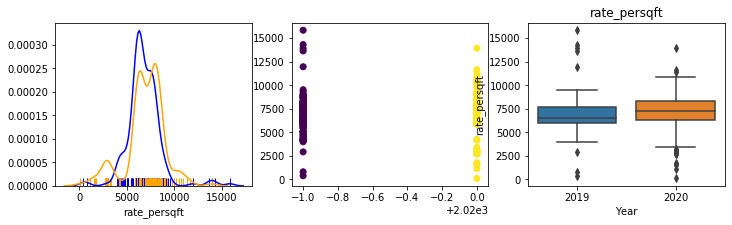

Gachibowli


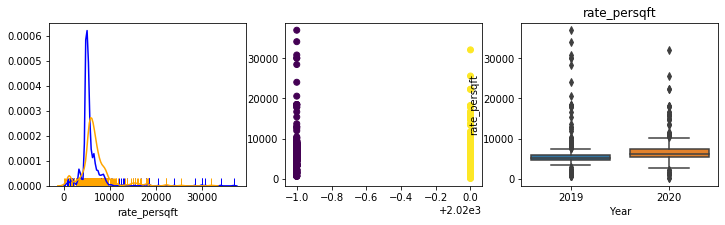

Madhapur


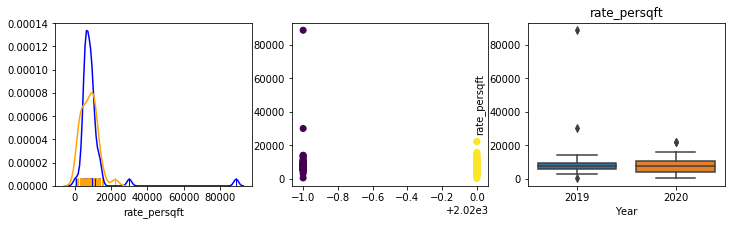

Serilingampally


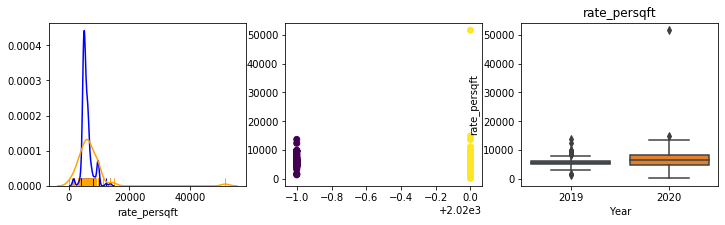

Kondapur


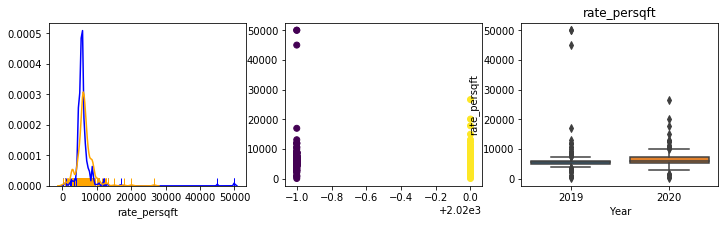

Jubilee Hills


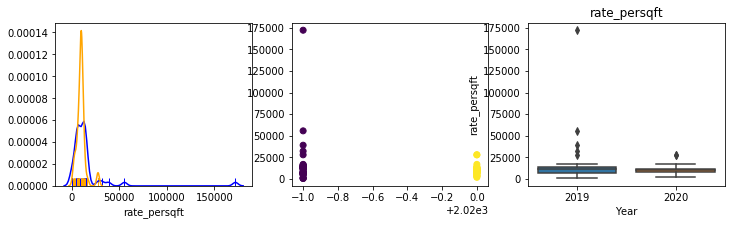

Banjara Hills


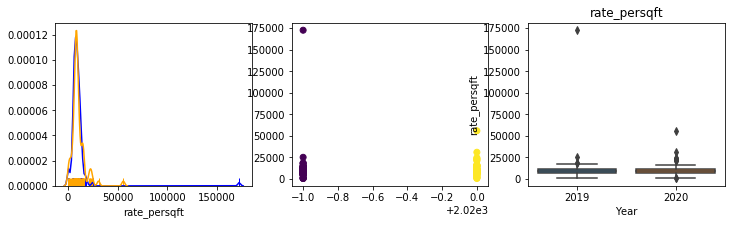

Miyapur


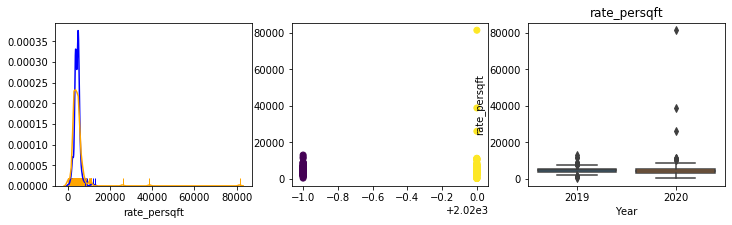

Manikonda


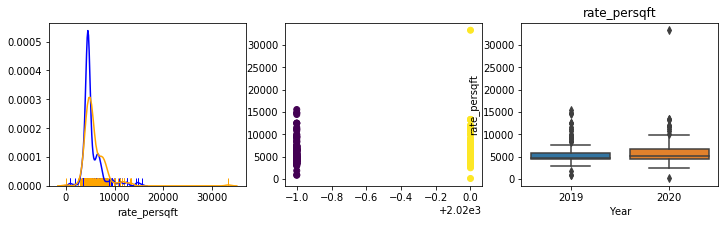

In [206]:
def printPairKdeAndBoxPlot(df, cols, hueVal):
    for col in cols:
        if(col != hueVal):   
            target_0 = df[df[hueVal]==2019]
            target_1 = df[df[hueVal]==2020]
            f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3))
            sns.distplot(target_0[col], hist=False, rug=True, ax=ax1, color='blue')
            sns.distplot(target_1[col], hist=False, rug=True, ax=ax1, color='orange')
            ax2.scatter(df[hueVal], df[col], c=df[hueVal])
            sns.boxplot(x=hueVal, y=col, data=df, ax=ax3)
            plt.title(col)
            plt.show() 

areas = np.array(hyd2020data['location'].unique())
for area in areas:
    print(area)
    area_2019_data = pd.DataFrame(newhyd2019data2[newhyd2019data2['location']==area].reset_index()['rate_persqft'])
    area_2019_data.columns = ['rate_persqft']
    area_2019_data['Year'] = 2019
    area_2020_data = pd.DataFrame(comb2020data[comb2020data['location']==area].reset_index()['rate_persqft'])
    area_2020_data.columns = ['rate_persqft']
    area_2020_data['Year'] = 2020
    area_data = pd.concat([area_2019_data, area_2020_data])
    printPairKdeAndBoxPlot(area_data, ['rate_persqft'], 'Year')

In [207]:
#H0 = There is no significant difference in real estate price before and after covid for Gachibowli
#Hq = There is  significant difference in real estate price before and after covid for Gachibowli
location = np.array(comb2020data['location'].unique())
for loc in location:
    data1 = np.array(comb2020data[comb2020data['location'] == loc].rate_persqft)
    data2 = np.array(newhyd2019data2[newhyd2019data2['location'] == loc].rate_persqft)
    t, p_value = stats.ttest_ind(data1 ,data2 , axis = 0)
    if p_value < 0.05:
        if t < 0:
            state = 'decreased'
        else:
            state = 'increased'
        print(loc, state, ':There is a significant difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', p_value, t)
    else:
        print(loc, ':There is no significant difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', p_value, t)

Hitech City :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.44189874089222947 0.7698584313192719
Gachibowli increased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 1.1291080177991875e-07 5.335194447897169
Madhapur :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.2222060237433112 -1.2266965543266746
Serilingampally increased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.04060420690422359 2.060344006333806
Kondapur :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.2367134559678864 1.1843570962107162
Jubilee Hills :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.16309594944632919 -1.4065046490300437
Banjara Hills :There is no significant difference between prices

In [208]:
area_names = []
price_2019=[]
price_2020=[]
result = pd.DataFrame()
for area in areas:
    data_2019 = newhyd2019data2[newhyd2019data2['location']==area]['rate_persqft']
    data_2020 = comb2020data[comb2020data['location']==area]['rate_persqft']
    area_names.append(area)
    price_2019.append(data_2019.mean())
    price_2020.append(data_2020.mean())

result['Area'] = area_names
result['price_2019'] = price_2019
result['price_2020'] = price_2020
result['Diff'] = result['price_2020']-result['price_2019']
result


Area    price_2019    price_2020         Diff
0      Hitech City   6808.613757   6966.259036   157.645280
1       Gachibowli   5745.142697   6759.416230  1014.273534
2         Madhapur   9736.679245   7915.684211 -1820.995035
3  Serilingampally   5874.264901   7056.900000  1182.635099
4         Kondapur   6186.455556   6524.028674   337.573118
5    Jubilee Hills  15572.311111  10047.622222 -5524.688889
6    Banjara Hills  10397.347458  10635.328947   237.981490
7          Miyapur   4562.936416   4886.724265   323.787849
8        Manikonda   5368.180392   5894.281106   526.100714

In [209]:
comb2020data.groupby(['title', 'location']).size()

title              location       
1 BHK Apartment    Gachibowli          3
                   Hitech City         2
                   Kondapur            7
                   Madhapur            3
                   Miyapur            19
                                      ..
Residential Plot   Serilingampally     5
Residential Plot   Banjara Hills       4
                   Jubilee Hills       2
                   Kondapur            3
                   Serilingampally     1
Length: 132, dtype: int64

In [210]:
#model building except for resale flats WITH MAKAAN DATA alone

In [211]:
hyd2019datawithoutresale = newhyd2019data2.loc[~(newhyd2019data2['building_status'] == 'Resale')]

In [212]:
hyd2019datawithoutresale.groupby('location').count()

title  price(L)  rate_persqft  area_insqft  building_status
location                                                                    
Banjara Hills      111       111           111          111              111
Gachibowli         879       879           879          879              879
Hitech City        185       185           185          185              185
Jubilee Hills       36        36            36           36               36
Kondapur           350       350           350          350              350
Madhapur            50        50            50           50               50
Manikonda          249       249           249          249              249
Miyapur            332       332           332          332              332
Serilingampally    147       147           147          147              147

In [213]:
hyd2020data.loc[(hyd2020data['building_status'] == 'Resale')]

title         location  price(L)  rate_persqft  area_insqft  \
7     Residential Plot      Hitech City     250.0          9259         2700   
228   Residential Plot       Gachibowli      49.0         22272          220   
229   Residential Plot       Gachibowli      29.0         18125          160   
230   Residential Plot       Gachibowli      38.0         16521          230   
231   Residential Plot       Gachibowli      28.0         15555          180   
232   Residential Plot       Gachibowli      40.0         13333          300   
234   Residential Plot       Gachibowli      46.0         25555          180   
238   Residential Plot       Gachibowli      89.0          3189         2790   
246   Residential Plot       Gachibowli       3.6           200         1800   
300   Residential Plot       Gachibowli     112.0          3336         3357   
378   Residential Plot       Gachibowli     399.0         22222         1800   
384   Residential Plot       Gachibowli     300.0         18214         1647   
449   Residential Plot       Gachibowli     210.0          7777         2700   
554   Residential Plot         Madhapur    1800.0         11428        15750   
585   Residential Plot         Madhapur    1200.0         22222         5400   
587   Residential Plot         Madhapur    1066.0         22222         4797   
590   Residential Plot  Serilingampally     300.0         11111         2700   
598   Residential Plot  Serilingampally     384.0          8888         4320   
625   Residential Plot  Serilingampally       7.5           119         6300   
694   Residential Plot         Kondapur     540.0         10000         5400   
783   Residential Plot         Kondapur     180.0          6666         2700   
811   Residential Plot         Kondapur     195.0          7222         2700   
847   Residential Plot         Kondapur     240.0          7751         3096   
848   Residential Plot         Kondapur     320.0          8888         3600   
854   Residential Plot         Kondapur     228.0          7794         2925   
895   Residential Plot    Jubilee Hills     350.0         14000         2500   
905   Residential Plot    Jubilee Hills    1249.0         16666         7497   
906   Residential Plot    Jubilee Hills    2000.0         27777         7200   
933   Residential Plot    Jubilee Hills    2500.0         27777         9000   
945   Residential Plot    Banjara Hills    2000.0         11111        18000   
946   Residential Plot    Banjara Hills    3101.0         15509        20000   
947   Residential Plot    Banjara Hills      57.0          4222         1350   
954   Residential Plot    Banjara Hills    1000.0         16173         6183   
988   Residential Plot    Banjara Hills    1400.0         14403         9720   
989   Residential Plot    Banjara Hills     400.0         14814         2700   
990   Residential Plot    Banjara Hills     800.0         14814         5400   
994   Residential Plot    Banjara Hills     150.0         11111         1350   
1050  Residential Plot          Miyapur      63.0           466        13500   
1081  Residential Plot          Miyapur     210.0         81395          258   
1083  Residential Plot          Miyapur      80.5          5555         1449   
1120  Residential Plot          Miyapur     100.0         38759          258   
1121  Residential Plot          Miyapur      85.0          4722         1800   
1295  Residential Plot        Manikonda     220.0         11530         1908   
1296  Residential Plot        Manikonda     100.0         33333          300   
1297  Residential Plot        Manikonda     175.0          7777         2250   
1298  Residential Plot        Manikonda     174.0          7956         2187   
1299  Residential Plot        Manikonda     105.0          3888         2700   
1339  Residential Plot        Manikonda     390.0          7222         5400   
1356  Residential Plot        Manikonda     100.0          7407         1350   
1364  Residential

In [221]:
hyd2020datawithoutresale = hyd2020data.loc[~(hyd2020data['building_status'] == 'Resale')]

In [222]:
hyd2020datawithoutresale.groupby('location').count()

title  price(L)  rate_persqft  area_insqft  building_status
location                                                                    
Banjara Hills       56        56            56           56               56
Gachibowli         342       342           342          342              342
Hitech City        165       165           165          165              165
Jubilee Hills       39        39            39           39               39
Kondapur           249       249           249          249              249
Madhapur            66        66            66           66               66
Manikonda          179       179           179          179              179
Miyapur            240       240           240          240              240
Serilingampally     48        48            48           48               48

In [223]:
#H0 = There is no significant difference in real estate price before and after covid for Gachibowli
#Hq = There is  significant difference in real estate price before and after covid for Gachibowli
#building with makkan data alone withoutresale
location = np.array(hyd2020datawithoutresale['location'].unique())
for loc in location:
    data1 = np.array(hyd2020datawithoutresale[hyd2020datawithoutresale['location'] == loc].rate_persqft)
    data2 = np.array(hyd2019datawithoutresale[hyd2019datawithoutresale['location'] == loc].rate_persqft)
    t, p_value = stats.ttest_ind(data1 ,data2 , axis = 0)
    if p_value < 0.05:
        if t < 0:
            state = 'decreased'
        else:
            state = 'increased'
        print(loc, state, ':There is a significant difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', p_value, t)
    else:
        print(loc, ':There is no significant difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', p_value, t)

Hitech City :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.4122902013454076 0.820856059839054
Gachibowli increased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 3.2669243021363415e-07 5.135866774411863
Madhapur :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.43968433155543785 -0.7754416785951163
Serilingampally :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.18142312659133497 1.3412264817145862
Kondapur :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.05000168400010069 1.9639310872056863
Jubilee Hills :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.13721848360459457 -1.5027456534960937
Banjara Hills :There is no significant difference between prices between

In [224]:
area_names = []
price_2019=[]
price_2020=[]
result = pd.DataFrame()
for area in areas:
    data_2019 = hyd2019datawithoutresale[hyd2019datawithoutresale['location']==area]['rate_persqft']
    data_2020 = hyd2020datawithoutresale[hyd2020datawithoutresale['location']==area]['rate_persqft']
    area_names.append(area)
    price_2019.append(data_2019.median())
    price_2020.append(data_2020.median())

result['Area'] = area_names
result['price_2019'] = price_2019
result['price_2020'] = price_2020
result['Diff'] = ((result['price_2020']-result['price_2019'])/result['price_2019'])*100
result


Area  price_2019  price_2020       Diff
0      Hitech City      6533.0      7175.0   9.827032
1       Gachibowli      5200.0      6100.0  17.307692
2         Madhapur      7591.0      7656.5   0.862864
3  Serilingampally      5400.0      5796.5   7.342593
4         Kondapur      5700.0      6085.0   6.754386
5    Jubilee Hills      9250.0     10000.0   8.108108
6    Banjara Hills      8750.0      8718.5  -0.360000
7          Miyapur      4761.0      4142.0 -13.001470
8        Manikonda      4650.0      5000.0   7.526882

In [252]:
data['PricePerSqft_2019'] = hyd2019datawithoutresale.groupby('location')['rate_persqft'].median()

In [253]:
data['PricePerSqft_2020'] = hyd2020datawithoutresale.groupby('location')['rate_persqft'].median()

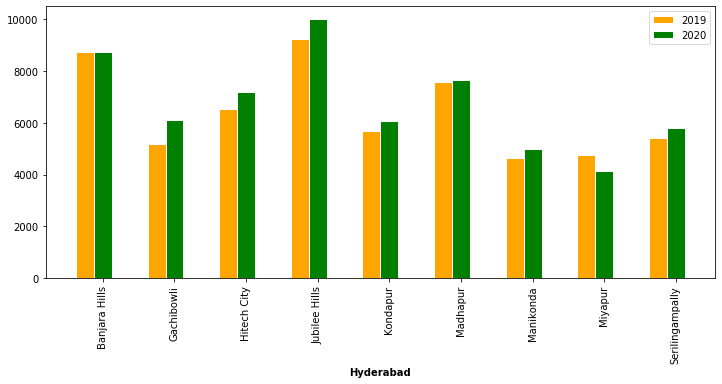

In [254]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = data['PricePerSqft_2019']
bars2 = data['PricePerSqft_2020']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.rcParams["figure.figsize"] = [12,5] 
# Make the plot
plt.bar(r1, bars1, color='orange', width=barWidth, edgecolor='white', label='2019')
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label='2020')
 
# Add xticks on the middle of the group bars
plt.xlabel('Hyderabad', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], data.index, rotation=90)
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [228]:
#without resale with commonfloor data alone
hyd2020cf1datawithoutresale = hyd2020cf1.loc[~(hyd2020cf1['building_status'] == 'Resale')]
hyd2020cf1datawithoutresale.groupby('location').count()

price(L)  rate_persqft  building_status  title  area_insqft
location                                                                    
Banjara Hills           7             7                7      7            7
Gachibowli             23            23               23     23           23
Jubilee Hills           2             2                2      2            2
Kondapur               17            17               17     17           17
Madhapur                6             6                6      6            6
Manikonda              16            16               16     16           16
Miyapur                20            20               20     20           20
Serilingampally         8             8                8      8            8

In [229]:
#Building model only with commonfloor data
location = np.array(hyd2020cf1datawithoutresale['location'].unique())
for loc in location:
    data1 = np.array(hyd2020cf1datawithoutresale[hyd2020cf1datawithoutresale['location'] == loc].rate_persqft)
    #print(data1)
    data2 = np.array(hyd2019datawithoutresale[hyd2019datawithoutresale['location'] == loc].rate_persqft)
    #print(data2)
    stat , p_value = stats.f_oneway(data1, data2)
    if p_value < 0.05:
        if stat < 0:
            state = 'decreased'
        else:
            state = 'increased'
        print(loc, state, ':There is a significant difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', p_value, stat)
    else:
        print(loc, ':There is no significant difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', p_value, stat)


Gachibowli increased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 2.3931461039152312e-05 18.03589172252979
Kondapur :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.17844221239265187 1.81754164027528
Madhapur :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.2862716058068166 1.1599128695360341
Banjara Hills :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.2097236270947546 1.5909325228131859
Jubilee Hills :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.5263524932779028 0.409346355776597
Serilingampally increased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 1.5340327812182265e-05 19.95332555527779
Miyapur :There is no significant difference between prices betwee

In [230]:
area_names = []
price_2019=[]
price_2020=[]
result = pd.DataFrame()
for area in areas:
    data_2019 = hyd2019datawithoutresale[hyd2019datawithoutresale['location']==area]['rate_persqft']
    data_2020 = hyd2020cf1datawithoutresale[hyd2020cf1datawithoutresale['location']==area]['rate_persqft']
    area_names.append(area)
    price_2019.append(data_2019.mean())
    price_2020.append(data_2020.mean())

result['Area'] = area_names
result['price_2019'] = price_2019
result['price_2020'] = price_2020
result['Diff'] = result['price_2020']-result['price_2019']
result


Area    price_2019    price_2020          Diff
0      Hitech City   6786.654054           NaN           NaN
1       Gachibowli   5609.268487   7697.826087   2088.557600
2         Madhapur   8193.640000   6355.833333  -1837.806667
3  Serilingampally   5823.503401  11971.375000   6147.871599
4         Kondapur   5931.891429   6870.411765    938.520336
5    Jubilee Hills  16165.972222   3001.000000 -13164.972222
6    Banjara Hills  10527.324324  18395.571429   7868.247104
7          Miyapur   4567.846386   5036.750000    468.903614
8        Manikonda   5278.152610   7258.937500   1980.784890

From the above we can conclude that Commonfloor data does not have sufficient datapoints for resale. 

In [231]:
comb2020datawithoutresale = comb2020data.loc[~(comb2020data['building_status'] == 'Resale')]
comb2020datawithoutresale.groupby('location').count()

title  price(L)  rate_persqft  area_insqft  building_status
location                                                                    
Banjara Hills       63        63            63           63               63
Gachibowli         365       365           365          365              365
Hitech City        165       165           165          165              165
Jubilee Hills       41        41            41           41               41
Kondapur           266       266           266          266              266
Madhapur            72        72            72           72               72
Manikonda          195       195           195          195              195
Miyapur            260       260           260          260              260
Serilingampally     56        56            56           56               56

In [232]:
location = np.array(comb2020datawithoutresale['location'].unique())
for loc in location:
    data1 = np.array(comb2020datawithoutresale[comb2020datawithoutresale['location'] == loc].rate_persqft)
    #print(data1)
    data2 = np.array(hyd2019datawithoutresale[hyd2019datawithoutresale['location'] == loc].rate_persqft)
    #print(data2)
    stat , p_value = stats.f_oneway(data1, data2)
    if p_value < 0.05:
        if stat < 0:
            state = 'decreased'
        else:
            state = 'increased'
        print(loc, state, ':There is a significant difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', p_value, stat)
    else:
        print(loc, ':There is no significant difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', p_value, stat)

Hitech City :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.41229020134543715 0.673804670974496
Gachibowli increased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 9.194071574092153e-09 33.460663635870475
Madhapur :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.3460340493997882 0.8949738249201984
Serilingampally increased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.0335559241933309 4.579814989540674
Kondapur increased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.03148823952519201 4.647411342536717
Jubilee Hills :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.11229887420841075 2.5818307907428397
Banjara Hills :There is no significant difference between p

In [233]:
area_names = []
price_2019=[]
price_2020=[]
result = pd.DataFrame()
for area in areas:
    data_2019 = hyd2019datawithoutresale[hyd2019datawithoutresale['location']==area]['rate_persqft']
    data_2020 = comb2020datawithoutresale[comb2020datawithoutresale['location']==area]['rate_persqft']
    area_names.append(area)
    price_2019.append(data_2019.mean())
    price_2020.append(data_2020.mean())

result['Area'] = area_names
result['price_2019'] = price_2019
result['price_2020'] = price_2020
result['Diff'] = result['price_2020']-result['price_2019']
result


Area    price_2019    price_2020         Diff
0      Hitech City   6786.654054   6952.363636   165.709582
1       Gachibowli   5609.268487   6518.172603   908.904116
2         Madhapur   8193.640000   7505.375000  -688.265000
3  Serilingampally   5823.503401   7080.339286  1256.835884
4         Kondapur   5931.891429   6388.176692   456.285263
5    Jubilee Hills  16165.972222   8924.951220 -7241.021003
6    Banjara Hills  10527.324324  10900.968254   373.643930
7          Miyapur   4567.846386   4455.669231  -112.177155
8        Manikonda   5278.152610   5616.297436   338.144825

From the above results we could conclude that makkan data is most relevant and consider the results from it alone for data comparison

### Final Results with resale data :


        
Gachibowli increased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.00039672643284372665 3.5519823520947935
        
Hitech City :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.06105843221655318 1.8790715849301212
        
Madhapur :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.25461488574887703 -1.144881686957964
        
Serilingampally :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.3835663108656713 -0.8733763117906225
        

        
Kondapur :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.9675527221616478 0.040694440876683474
        
Banjara Hills :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.9416179658117386 -0.07334110687803069
        
Jubilee Hills :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.25266036375019085 -1.1513783887315114
        
Miyapur decreased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.00032627211953210276 -3.614902091493212
        
Manikonda :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.2232474271205115 1.219643751146626
    

In [242]:
area_names = []
price_2019=[]
price_2020=[]
result = pd.DataFrame()
for area in areas:
    data_2019 = newhyd2019data2[newhyd2019data2['location']==area]['rate_persqft']
    data_2020 = hyd2020data[hyd2020data['location']==area]['rate_persqft']
    area_names.append(area)
    price_2019.append(data_2019.mean())
    price_2020.append(data_2020.mean())

result['Area'] = area_names
result['price_2019'] = price_2019
result['price_2020'] = price_2020
result['Diff'] = result['price_2020']-result['price_2019']
result



Area    price_2019    price_2020         Diff
0      Hitech City   6808.613757   6966.259036   157.645280
1       Gachibowli   5745.142697   6690.344633   945.201936
2         Madhapur   9736.679245   8088.753623 -1647.925622
3  Serilingampally   5874.264901   6291.098039   416.833139
4         Kondapur   6186.455556   6395.211765   208.756209
5    Jubilee Hills  15572.311111  10375.372093 -5196.939018
6    Banjara Hills  10397.347458  10314.828125   -82.519333
7          Miyapur   4562.936416   4851.575510   288.639094
8        Manikonda   5368.180392   5748.169312   379.988920

### Final results without resale data : Omitting resale data as the rate per square feet may not be appropriate

Gachibowli increased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 9.756037201731495e-05 3.9095514997216747
        
Hitech City increased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.0478844273896836 1.9853808934373216
        
Madhapur :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.2920338192607558 -1.0587483053078235
        
Serilingampally :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.4332479808321955 -0.7853773574010577
         
Kondapur :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.2607756922552173 1.1256235452204228
        
Banjara Hills :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.7707454667399047 -0.29188235199546453
        
Jubilee Hills :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.19517205939462587 -1.3071001414195036
        
Miyapur decreased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.00016349594588673032 -3.794829475435738
        
Manikonda :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.3485191337382496 0.9384930933212623

In [243]:
data = hyd2019datawithoutresale.groupby('location')['rate_persqft'].mean()
trace = go.Bar(x = data.index,
               #text = ['{:.1f} %'.format(val) for val in (data.values / electronicsdf.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000111'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of  average price of plots according to location for the year 2019'.format(hyd2019datawithoutresale.shape[0]),
              xaxis = dict(title = 'location'),
              yaxis = dict(title = 'price(L)'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
#iplot(fig)
py.offline.iplot(fig)

In [244]:
data = hyd2020datawithoutresale.groupby('location')['rate_persqft'].mean()
trace = go.Bar(x = data.index,
               #text = ['{:.1f} %'.format(val) for val in (data.values / electronicsdf.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000111'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution of average price of the plots according to the location for the year 2020'.format(hyd2020datawithoutresale.shape[0]),
              xaxis = dict(title = 'location'),
              yaxis = dict(title = 'price(L)'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
#iplot(fig)
py.offline.iplot(fig)

Hitech City


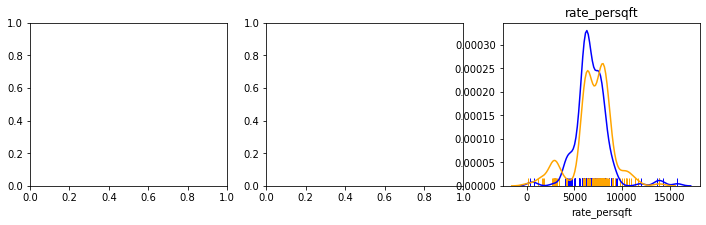

Gachibowli


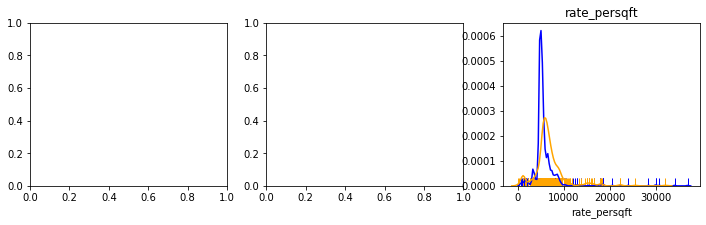

Madhapur


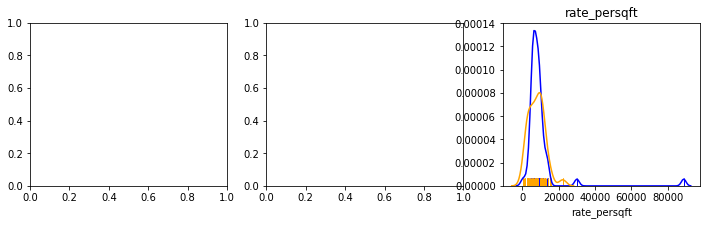

Serilingampally


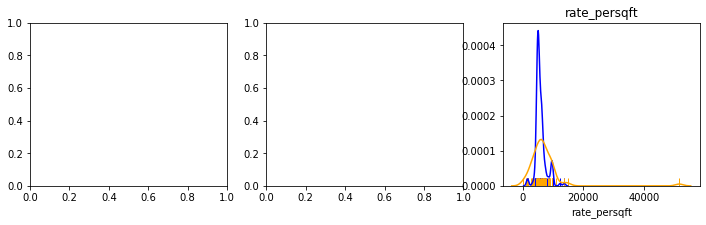

Kondapur


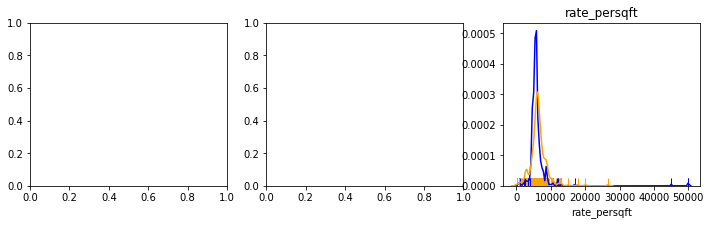

Jubilee Hills


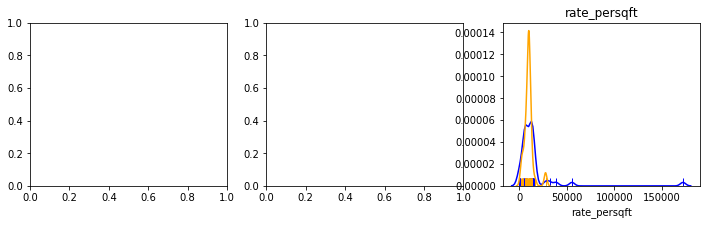

Banjara Hills


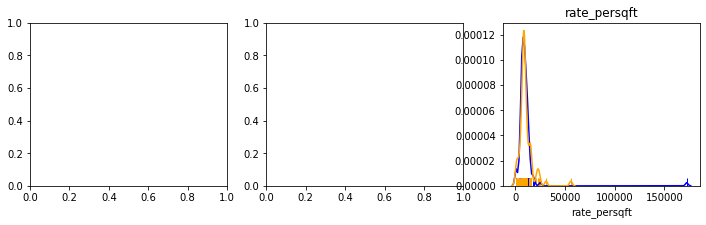

Miyapur


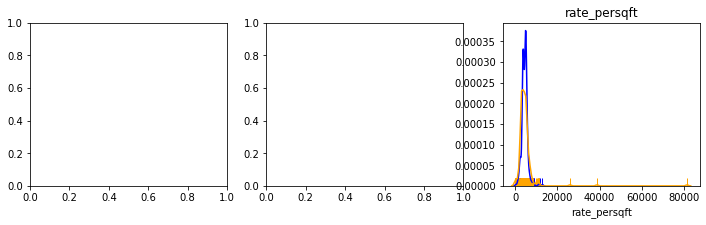

Manikonda


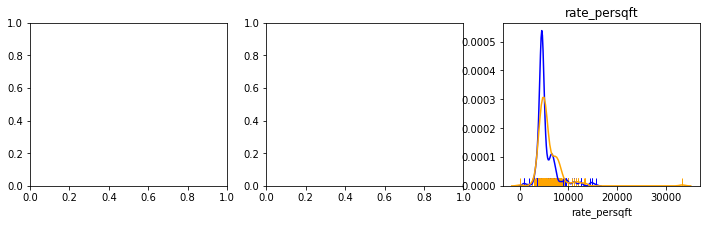

In [245]:
def printPairKdeAndBoxPlot(df, cols, hueVal):
    for col in cols:
        if(col != hueVal):   
            target_0 = df[df[hueVal]==2019]
            target_1 = df[df[hueVal]==2020]
            f, (ax1) = plt.subplots(1, 3, figsize=(12,3))
            sns.distplot(target_0[col], hist=False, rug=True, color='blue')
            sns.distplot(target_1[col], hist=False, rug=True, color='orange')
            #ax2.scatter(df[hueVal], df[col], c=df[hueVal])
            #sns.boxplot(x=hueVal, y=col, data=df, ax=ax3)
            plt.title(col)
            plt.show() 

areas = np.array(hyd2020data['location'].unique())
for area in areas:
    print(area)
    area_2019_data = pd.DataFrame(newhyd2019data2[newhyd2019data2['location']==area].reset_index()['rate_persqft'])
    area_2019_data.columns = ['rate_persqft']
    area_2019_data['Year'] = 2019
    area_2020_data = pd.DataFrame(comb2020data[comb2020data['location']==area].reset_index()['rate_persqft'])
    area_2020_data.columns = ['rate_persqft']
    area_2020_data['Year'] = 2020
    area_data = pd.concat([area_2019_data, area_2020_data])
    printPairKdeAndBoxPlot(area_data, ['rate_persqft'], 'Year')

Hitech City


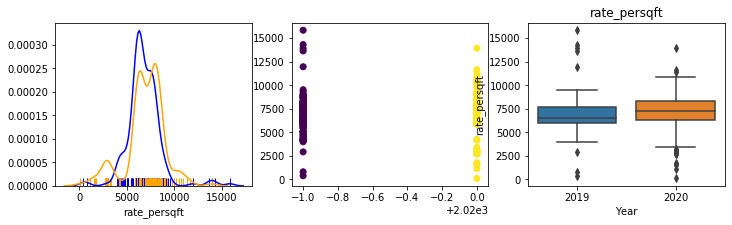

Gachibowli


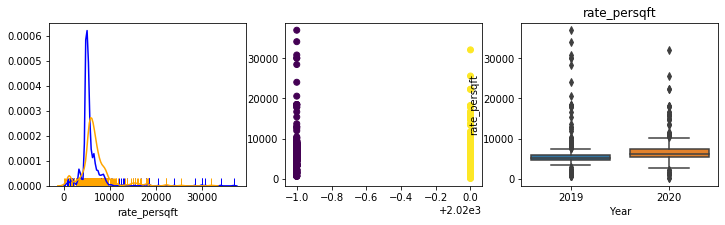

Madhapur


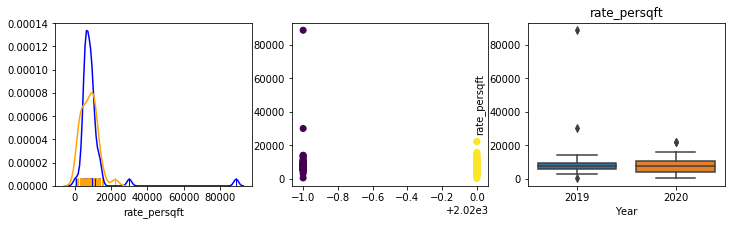

Serilingampally


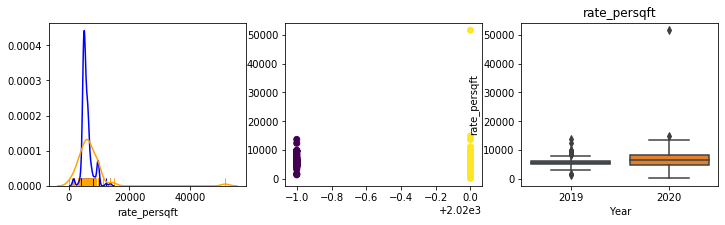

Kondapur


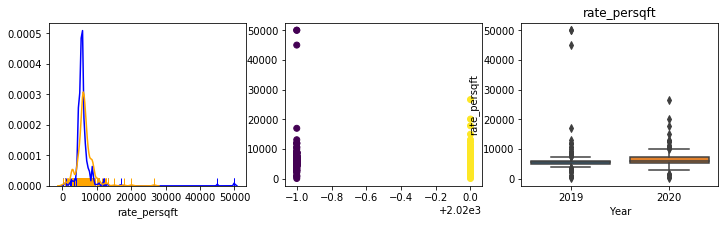

Jubilee Hills


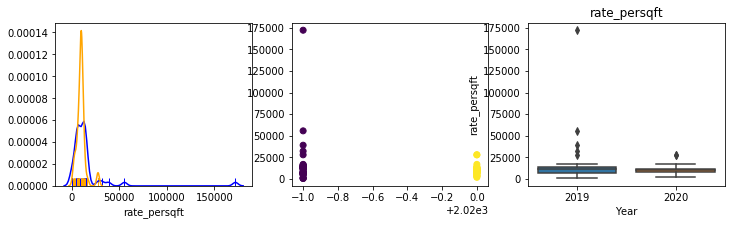

Banjara Hills


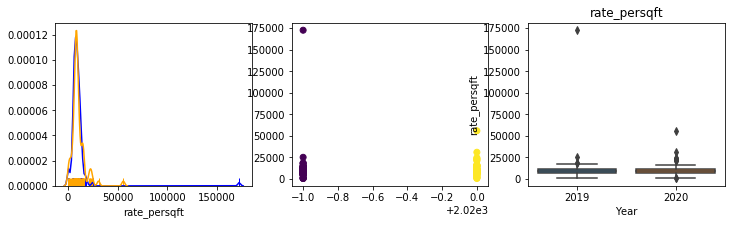

Miyapur


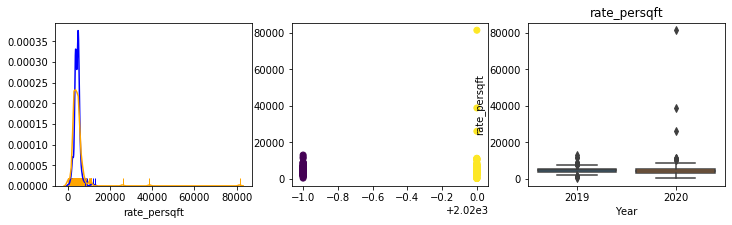

Manikonda


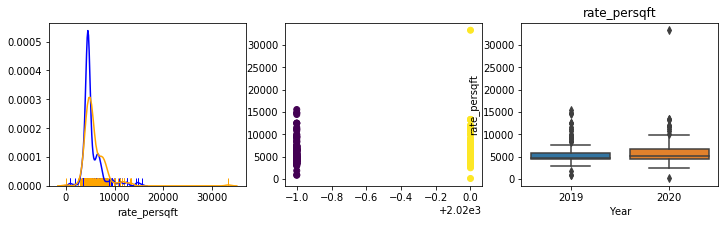

In [246]:
def printPairKdeAndBoxPlot(df, cols, hueVal):
    for col in cols:
        if(col != hueVal):   
            target_0 = df[df[hueVal]==2019]
            target_1 = df[df[hueVal]==2020]
            f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3))
            sns.distplot(target_0[col], hist=False, rug=True, ax=ax1, color='blue')
            sns.distplot(target_1[col], hist=False, rug=True, ax=ax1, color='orange')
            ax2.scatter(df[hueVal], df[col], c=df[hueVal])
            sns.boxplot(x=hueVal, y=col, data=df, ax=ax3)
            plt.title(col)
            plt.show() 

areas = np.array(hyd2020data['location'].unique())
for area in areas:
    print(area)
    area_2019_data = pd.DataFrame(newhyd2019data2[newhyd2019data2['location']==area].reset_index()['rate_persqft'])
    area_2019_data.columns = ['rate_persqft']
    area_2019_data['Year'] = 2019
    area_2020_data = pd.DataFrame(comb2020data[comb2020data['location']==area].reset_index()['rate_persqft'])
    area_2020_data.columns = ['rate_persqft']
    area_2020_data['Year'] = 2020
    area_data = pd.concat([area_2019_data, area_2020_data])
    printPairKdeAndBoxPlot(area_data, ['rate_persqft'], 'Year')

In [247]:
area_names = []
price_2019=[]
price_2020=[]
result = pd.DataFrame()
for area in areas:
    data_2019 = hyd2019datawithoutresale[hyd2019datawithoutresale['location']==area]['rate_persqft']
    data_2020 = hyd2020datawithoutresale[hyd2020datawithoutresale['location']==area]['rate_persqft']
    area_names.append(area)
    price_2019.append(data_2019.mean())
    price_2020.append(data_2020.mean())

result['Area'] = area_names
result['price_2019'] = price_2019
result['price_2020'] = price_2020
result['Diff'] = result['price_2020']-result['price_2019']
result['diffinper'] = (result['Diff']/result['price_2020'])*100
result.sort_values('Area')

Area    price_2019   price_2020         Diff  diffinper
6    Banjara Hills  10527.324324  9964.142857  -563.181467  -5.652081
1       Gachibowli   5609.268487  6438.839181   829.570694  12.883855
0      Hitech City   6786.654054  6952.363636   165.709582   2.383500
5    Jubilee Hills  16165.972222  9228.743590 -6937.228632 -75.169806
4         Kondapur   5931.891429  6355.253012   423.361583   6.661601
2         Madhapur   8193.640000  7609.878788  -583.761212  -7.671097
8        Manikonda   5278.152610  5469.469274   191.316663   3.497902
7          Miyapur   4567.846386  4407.245833  -160.600552  -3.644012
3  Serilingampally   5823.503401  6265.166667   441.663265   7.049505

In [248]:
hyd2019datawithoutresale.groupby('location').count()

title  price(L)  rate_persqft  area_insqft  building_status
location                                                                    
Banjara Hills      111       111           111          111              111
Gachibowli         879       879           879          879              879
Hitech City        185       185           185          185              185
Jubilee Hills       36        36            36           36               36
Kondapur           350       350           350          350              350
Madhapur            50        50            50           50               50
Manikonda          249       249           249          249              249
Miyapur            332       332           332          332              332
Serilingampally    147       147           147          147              147

In [249]:
hyd2020datawithoutresale.groupby('location').count()

title  price(L)  rate_persqft  area_insqft  building_status
location                                                                    
Banjara Hills       56        56            56           56               56
Gachibowli         342       342           342          342              342
Hitech City        165       165           165          165              165
Jubilee Hills       39        39            39           39               39
Kondapur           249       249           249          249              249
Madhapur            66        66            66           66               66
Manikonda          179       179           179          179              179
Miyapur            240       240           240          240              240
Serilingampally     48        48            48           48               48

Hitech city results varied with and without resale data as 2020 data does not contain resale information but 2019 had resale data for this particular city